# Analysing Stackoverflow's Annual Developer Survey
## by José Manuel García
### Data Science Nanodegree

#### June 8th 2020
--------------------

## Table of Contents
- [Data Preparation](#prepare)
- [Question 1](#question1)
- [Question 2](#question2)
- [Question 3](#question3)

## Introduction
In this report, the information stored in Stackoverflow's 2017, 2018 and 2019 Annual Developer Surveys is to be used to answer 3 questions regarding programming languages and their use.

To see a detailed explaination of the results, pleae go to [my published article](https://medium.com/@josem5garcialopez/what-is-the-evolution-of-programming-languages-in-the-last-3-years-f507aa99f787).

<a id='prepare'></a>
## Data Preparation
___________________

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# Reading all the datasets
df_2019 = pd.read_csv('data/survey_results_public_2019.csv', low_memory=False)
df_2019['year'] = '2019'
df_2018 = pd.read_csv('data/survey_results_public_2018.csv', low_memory=False)
df_2018['year'] = '2018'
df_2018 = df_2018.rename(columns={'CompanySize': 'OrgSize'})
df_2017 = pd.read_csv('data/survey_results_public_2017.csv', low_memory=False)
df_2017['year'] = '2017'
df_2017 = df_2017.rename(columns={'HaveWorkedLanguage': 'LanguageWorkedWith',
                                  'WantWorkLanguage': 'LanguageDesireNextYear',
                                  'CompanySize': 'OrgSize'})

In [3]:
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,year
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,2019
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,2019
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult,2019
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,2019
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy,2019


In [4]:
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,OrgSize,DevType,...,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,year
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy,2018
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,2018
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy,2018
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,2018


In [5]:
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,OrgSize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,year
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN,2017
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0,2017
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,2017
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,2017
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


In [6]:
# List with languages used to work
work_language = pd.DataFrame()
work_language = work_language.append(df_2019[['year', 'LanguageWorkedWith', 'OrgSize']], ignore_index = True)
work_language = work_language.append(df_2018[['year', 'LanguageWorkedWith', 'OrgSize']], ignore_index = True)
work_language = work_language.append(df_2017[['year', 'LanguageWorkedWith', 'OrgSize']], ignore_index = True)

# List of the most desired language for the next year 
desired_language = pd.DataFrame()
desired_language = desired_language.append(df_2019[['year', 'LanguageDesireNextYear']], ignore_index = True)
desired_language = desired_language.append(df_2018[['year', 'LanguageDesireNextYear']], ignore_index = True)
desired_language = desired_language.append(df_2017[['year', 'LanguageDesireNextYear']], ignore_index = True)

In [7]:
# Drop NaNs in both DataFrames
work_language.dropna(inplace=True)
desired_language.dropna(inplace=True)

In [8]:
def tune_dataframe(df, column):
    ''' Modify the current DataFrame to show percentages of programming languages,
        returns modified DataFrame    
    '''
    df_final = pd.DataFrame()
    for year in np.unique(df.year):
        df_copy = df.query('year == "' + year + '"')
        column_series = df_copy[column].apply(lambda x: x.split(';'))

        data_list = []
        for row in column_series:
            for obj in row:
                data_list.append(obj.strip())

        grouped_list = dict(Counter(data_list))
        grouped_dict = [{'Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]

        df_year = pd.DataFrame(grouped_dict)
        
        df_year['Percent_year'] = df_year['Count']/df_year['Count'].sum()
        
        df_final = df_final.append(df_year, ignore_index=True)
        
    return df_final
    
work_language_percent = tune_dataframe(work_language, 'LanguageWorkedWith')
desired_language_percent = tune_dataframe(desired_language, 'LanguageDesireNextYear')

In [9]:
def language_orgsize(df, all_languages, cols=['LanguageWorkedWith', 'OrgSize']):
    ''' Provides a DataFrame with just information of OrgSize and the Languages Used,
        returns DataFrame    
    '''
    
    df_copy = df.loc[:, cols].copy()
    
    for i in all_languages:
        df_copy.loc[:, i] = 0
    
    df_copy[cols[0]] = df_copy[cols[0]].apply(lambda x: x.split(';'))
    
    for i in df_copy.index:
        langs = df_copy.loc[i, 'LanguageWorkedWith']
        df_copy.loc[i, langs] = 1
    
    return df_copy
    
work_language_orgsize = language_orgsize(work_language.query('year == "2019"'),
                                         work_language_percent.Language.tolist())

In [10]:
def language_orgsize_percent(df):
    ''' Calculate percentages language usage per Organization Size ,
        returns DataFrame    
    '''
    
    df_copy = df.copy()
    
    df_final = pd.DataFrame()
    list_columns = df_copy.iloc[:, 2:].columns
    list_index = np.unique(df_copy.OrgSize)
    values = []
    for org_type in list_index:
        df_org = df_copy.query('OrgSize == "' + org_type + '"')
        aux_vals = df_org.loc[:, list_columns].sum(axis=0) / df_org.loc[:, list_columns].sum(axis=0).sum()
        values.append(aux_vals.values.tolist())
        
    df_final = pd.DataFrame(values, index=list_index, columns=list_columns)        
    return df_final

work_language_orgsize_percent = language_orgsize_percent(work_language_orgsize)

<a id='question1'></a>
## Question 1: What has been the evolution of the most used programming languages during the last years?
--------------------------

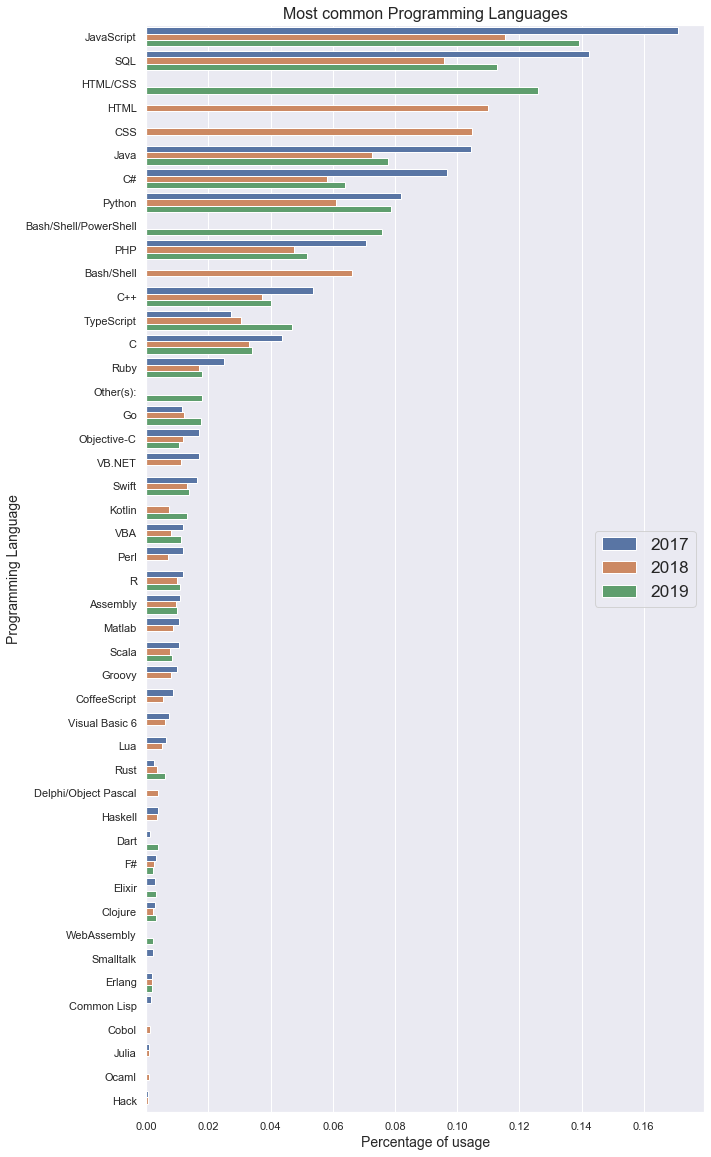

In [11]:
plt.figure(figsize=(10, 20))
sns.barplot(x = 'Percent_year', 
            y = 'Language',
            hue = 'Year',
            data = work_language_percent.sort_values(by='Percent_year', ascending=False))

plt.xlabel("Percentage of usage", fontsize = 14)
plt.ylabel("Programming Language", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most common Programming Languages', size = 16)
plt.show()

<a id='question2'></a>
## Question 2: What has been the evolution of the most wanted programming languages during the last years?

--------------------------

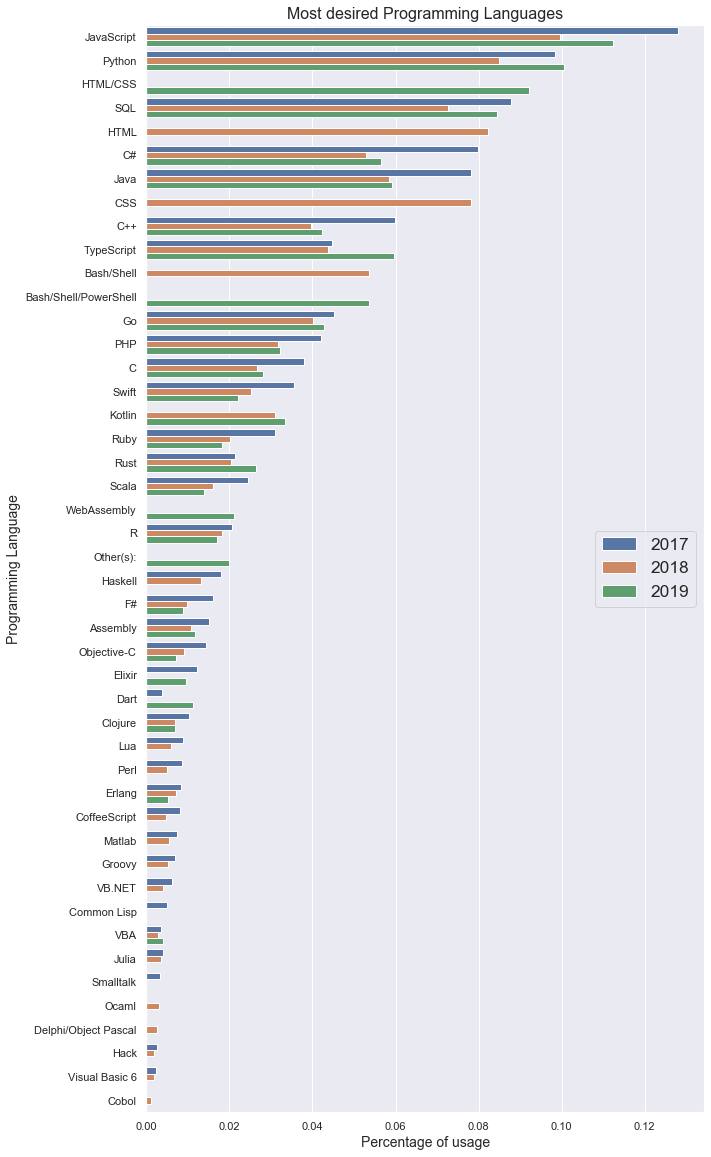

In [12]:
plt.figure(figsize=(10, 20))
sns.barplot(x = 'Percent_year', 
            y = 'Language',
            hue = 'Year',
            data = desired_language_percent.sort_values(by='Percent_year', ascending=False))

plt.xlabel("Percentage of usage", fontsize = 14)
plt.ylabel("Programming Language", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most desired Programming Languages', size = 16)
plt.show()

<a id='question3'></a>
## Question 3: Relationship between company size and most used programming languages during 2019?
--------------------------

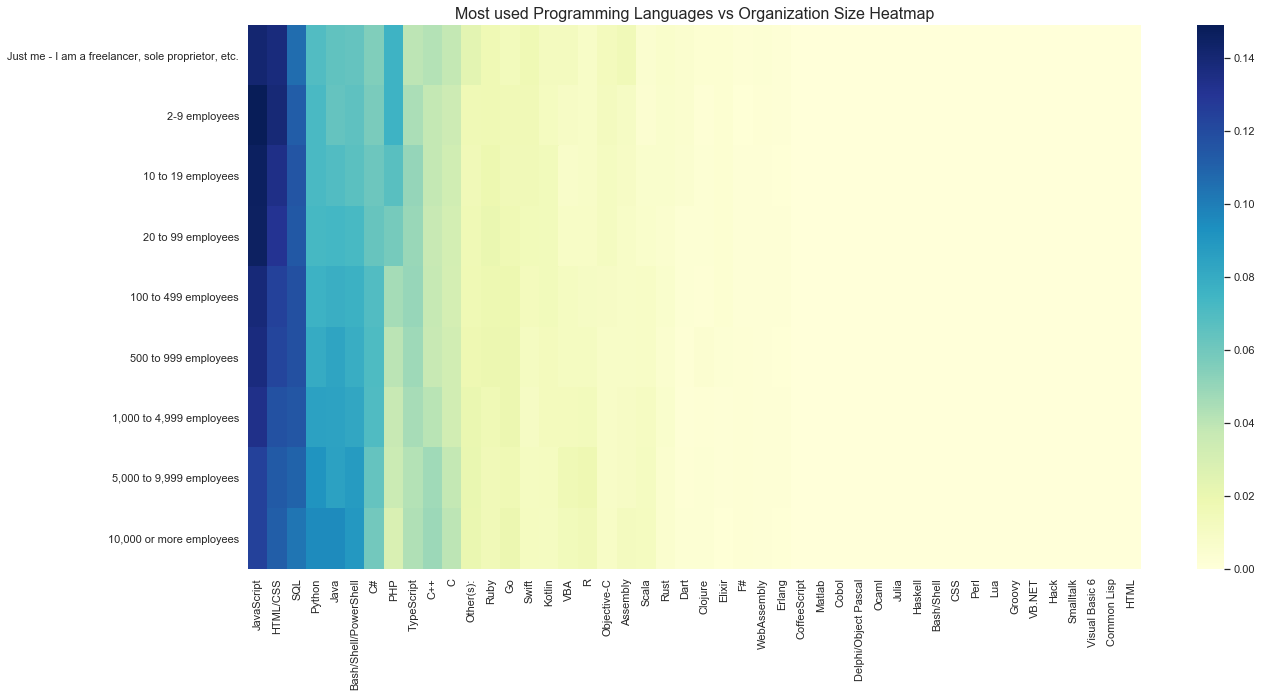

In [15]:
order_index = ['Just me - I am a freelancer, sole proprietor, etc.',
               '2-9 employees',
               '10 to 19 employees',
               '20 to 99 employees',
               '100 to 499 employees',
               '500 to 999 employees',
               '1,000 to 4,999 employees',
               '5,000 to 9,999 employees',
               '10,000 or more employees']

matrix = work_language_orgsize_percent.loc[order_index, :]
matrix = matrix.reindex(matrix.mean().sort_values(ascending=False).index, axis=1)

plt.figure(figsize=(20, 10))
sns.heatmap(matrix, cmap="YlGnBu")
plt.title('Most used Programming Languages vs Organization Size Heatmap', size = 16)
plt.ylabel('')
plt.show()